In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
plt.style.use('ggplot')

In [84]:
from datetime import datetime
import time

In [4]:
with open('slurm.log', 'rt') as f:
    txt = f.read()

In [12]:
c_dim = [100, 150, 200, 250]
py_dim = [10, 15, 20, 25]

```
rendr go: 0.653288007 seconds to render (w/ 0 threads) to cube-rgb.nrrd
```

In [113]:
seconds = re.findall(r'(\d+\.?\d*?) seconds', txt)
seconds = [float(s) for s in seconds]

In [13]:
len(seconds) # 4 dims * 10 trials

40

```
100%|██████████| 10/10 [00:34<00:00,  3.25s/it]
100%|██████████| 10/10 [00:34<00:00,  3.46s/it]
```

In [60]:
# find those below 1 min
pat = r'100\%.*?(\d{2}/\d{2} \[00:[1-9]\d)<\d{2}'
formatted_time = re.findall(pat, txt)

In [63]:
len(formatted_time) # 1 dims * 10 trials * replicates

20

In [55]:
pat2 = r'100\%.*?(\d{2}/\d{2} \[\d[1-9]:\d{2})<\d{2}'
formatted_time2 = re.findall(pat2, txt)

In [56]:
len(formatted_time2)

60

In [62]:
formatted_time

['10/10 [00:34',
 '10/10 [00:34',
 '10/10 [00:33',
 '10/10 [00:33',
 '10/10 [00:31',
 '10/10 [00:31',
 '10/10 [00:32',
 '10/10 [00:32',
 '10/10 [00:32',
 '10/10 [00:32',
 '10/10 [00:35',
 '10/10 [00:35',
 '10/10 [00:31',
 '10/10 [00:31',
 '10/10 [00:35',
 '10/10 [00:35',
 '10/10 [00:32',
 '10/10 [00:32',
 '10/10 [00:31',
 '10/10 [00:31']

In [57]:
formatted_time2

['15/15 [01:13',
 '15/15 [01:13',
 '15/15 [01:10',
 '15/15 [01:10',
 '15/15 [01:13',
 '15/15 [01:13',
 '15/15 [01:10',
 '15/15 [01:10',
 '15/15 [01:11',
 '15/15 [01:11',
 '15/15 [01:18',
 '15/15 [01:18',
 '15/15 [01:11',
 '15/15 [01:11',
 '15/15 [01:11',
 '15/15 [01:11',
 '15/15 [01:10',
 '15/15 [01:10',
 '15/15 [01:11',
 '15/15 [01:11',
 '20/20 [02:11',
 '20/20 [02:11',
 '20/20 [02:21',
 '20/20 [02:21',
 '20/20 [02:08',
 '20/20 [02:08',
 '20/20 [02:07',
 '20/20 [02:07',
 '20/20 [02:06',
 '20/20 [02:06',
 '20/20 [02:22',
 '20/20 [02:22',
 '20/20 [02:08',
 '20/20 [02:08',
 '20/20 [02:07',
 '20/20 [02:07',
 '20/20 [02:05',
 '20/20 [02:05',
 '20/20 [02:06',
 '20/20 [02:06',
 '25/25 [03:18',
 '25/25 [03:18',
 '25/25 [03:20',
 '25/25 [03:20',
 '25/25 [03:15',
 '25/25 [03:15',
 '25/25 [03:19',
 '25/25 [03:19',
 '25/25 [03:21',
 '25/25 [03:21',
 '25/25 [03:16',
 '25/25 [03:16',
 '25/25 [03:20',
 '25/25 [03:20',
 '25/25 [03:40',
 '25/25 [03:40',
 '25/25 [03:16',
 '25/25 [03:16',
 '25/25 [03:18

In [91]:
def strip_time(s):
    d = datetime.strptime(s, '%M:%S')
    return d.minute * 60 + d.second

In [92]:
strip_time('00:34'), strip_time('01:34')

(34, 94)

In [64]:
pat = r'100\%.*?(00:[1-9]\d)<\d{2}'
formatted_time = re.findall(pat, txt)

In [94]:
dim10 = formatted_time[::2]
dim10 = [strip_time(s) for s in dim10]
len(dim10)

10

In [71]:
pat2 = r'100\%.*?(\d[1-9]:\d{2})<\d{2}'
formatted_time2 = re.findall(pat2, txt)

In [95]:
dims = formatted_time2[::2]
dims = [strip_time(s) for s in dims]
len(dims)

30

In [114]:
c_df = pd.DataFrame({
    '100': seconds[:10],
    '150': seconds[10:20],
    '200': seconds[20:30],
    '250': seconds[30:]
})

In [117]:
c_df

,100,150,200,250
0,0.656447,1.471674,2.615773,4.096958
1,0.653288,1.507441,2.615707,4.173544
2,0.655002,1.472529,2.619202,4.091317
3,0.659233,1.477854,2.615125,4.096171
4,0.655587,1.471716,2.618425,4.107766
5,0.655272,1.481416,2.616183,4.171702
6,0.673096,1.471608,2.664417,4.086665
7,0.654556,1.476214,2.618265,4.099706
8,0.654009,1.477941,2.617197,4.088285
9,0.665119,1.473059,2.616636,4.111863


In [118]:
py_df = pd.DataFrame({
    '10': dim10,
    '15': dims[:10],
    '20': dims[10:20],
    '25': dims[20:]
})

In [119]:
py_df

,10,15,20,25
0,34,73,131,198
1,33,70,141,200
2,31,73,128,195
3,32,70,127,199
4,32,71,126,201
5,35,78,142,196
6,31,71,128,200
7,35,71,127,220
8,32,70,125,196
9,31,71,126,198


In [120]:
c_df['trial'] = range(1, 11)
py_df['trial'] = range(1, 11)

In [121]:
concat = pd.concat([
    c_df.melt(id_vars='trial').assign(source='c'),
    py_df.melt(id_vars='trial').assign(source='py')
])

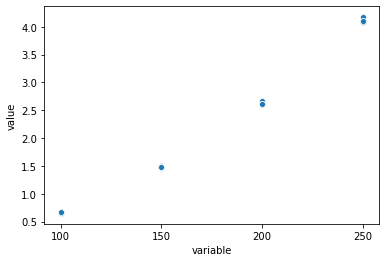

In [122]:
sns.scatterplot(data=concat[concat.source == 'c'],
                x='variable', y='value')

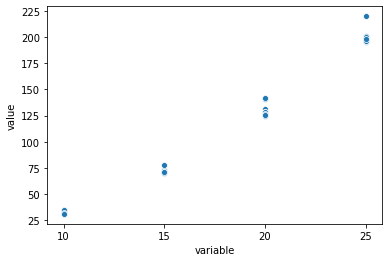

In [123]:
sns.scatterplot(data=concat[concat.source == 'py'],
                x='variable', y='value')

In [124]:
concat

,trial,variable,value,source
0,1,100,0.656447,c
1,2,100,0.653288,c
2,3,100,0.655002,c
3,4,100,0.659233,c
4,5,100,0.655587,c
...,...,...,...,...
35,6,25,196.000000,py
36,7,25,200.000000,py
37,8,25,220.000000,py
38,9,25,196.000000,py


In [125]:
# min-max normalization
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

In [129]:
c_normalized = c_df.melt(id_vars='trial')
c_normalized.variable = c_normalized.variable.astype(int) / 100
c_normalized.value = normalize(c_normalized.value)

In [132]:
py_normalized = py_df.melt(id_vars='trial')
py_normalized.variable = py_normalized.variable.astype(int) / 10
py_normalized.value = normalize(py_normalized.value)

In [143]:
concat_norm = pd.concat([
    c_normalized.assign(source='C'),
    py_normalized.assign(source='Python')
])

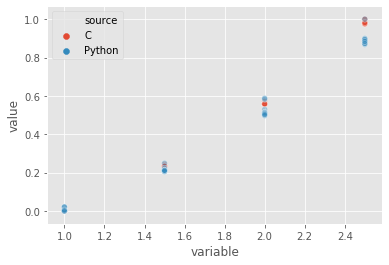

In [213]:
sns.scatterplot(data=concat_norm, x='variable', y='value', 
                hue='source', alpha=0.4)

[Text(0, 0.5, 'Normalized runtime'),
 Text(0.5, 0, 'Scale of side length of output image')]

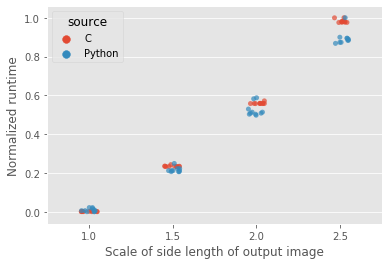

In [216]:
ax = sns.stripplot(data=concat_norm, x='variable', y='value', 
                hue='source', alpha=0.7)
ax.set(xlabel='Scale of side length of output image',
       ylabel='Normalized runtime')

We may conclude that both the program runtime of the C code and the Python code scale roughly similarly as the side length of the output image.

In [155]:
# some data tables
avg = concat.groupby(['variable', 'source']).mean().reset_index()
avg.variable = avg.variable.astype(int)
avg.drop(columns='trial', inplace=True)
avg.sort_values(by=['variable', 'source'], inplace=True)
avg.loc[avg.source == 'py', 'source'] = 'Python'
avg.loc[avg.source == 'c', 'source'] = 'C'
avg.columns = ['Output length', 'Source', 'Runtime (seconds)']

In [156]:
avg

,Output length,Source,Runtime (seconds)
0,10,Python,32.600000
2,15,Python,71.800000
4,20,Python,130.100000
6,25,Python,200.300000
1,100,C,0.658161
3,150,C,1.478145
5,200,C,2.621693
7,250,C,4.112398


In [158]:
print(avg.to_latex(index=False))

\begin{tabular}{rlr}
\toprule
 Output length & Source &  Runtime (seconds) \\
\midrule
            10 & Python &          32.600000 \\
            15 & Python &          71.800000 \\
            20 & Python &         130.100000 \\
            25 & Python &         200.300000 \\
           100 &      C &           0.658161 \\
           150 &      C &           1.478145 \\
           200 &      C &           2.621693 \\
           250 &      C &           4.112398 \\
\bottomrule
\end{tabular}



In [179]:
with open('c_slurm.log', 'rt') as f:
    txt2 = f.read()

In [183]:
seconds2 = re.findall(r'(\d+\.?\d*?) seconds', txt2)

In [184]:
seconds2 = [float(s) for s in seconds2]
len(seconds2)

180

In [188]:
np.mean(seconds2[:10])

0.1851089002

In [196]:
sec = seconds2[10:]

In [197]:
threads = range(0, 17)
d = {}
for t in threads:
    d[t] = sec[10 * t: 10 * (t+1)]

In [198]:
multithread = pd.DataFrame(d)

In [201]:
multithread['trial'] = range(1, 11)

In [205]:
melted = multithread.melt(id_vars='trial')

In [209]:
avg_multi = melted.groupby('variable').mean().reset_index()
avg_multi.drop(columns='trial', inplace=True)

In [210]:
avg_multi.head()

,variable,value
0,0,6.185676
1,1,6.161690
2,2,3.197577
3,3,2.161923
4,4,1.645350


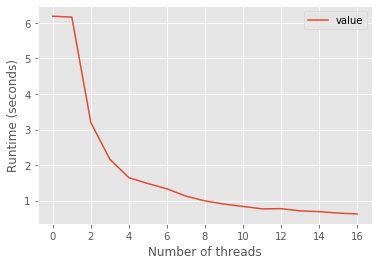

In [215]:
avg_multi.plot(x='variable', y='value', xlabel='Number of threads',
              ylabel='Runtime (seconds)')